predicted=499.202798, expected=423.666667
predicted=391.233186, expected=458.166667
predicted=483.197849, expected=511.000000
predicted=530.660763, expected=487.666667
predicted=485.965723, expected=472.000000
predicted=493.373383, expected=611.166667
predicted=659.503594, expected=539.500000
predicted=456.659235, expected=458.166667
predicted=469.564717, expected=410.166667
predicted=390.831742, expected=364.333333
predicted=321.700942, expected=400.166667
predicted=447.668458, expected=396.333333
predicted=402.273467, expected=304.333333
predicted=286.341515, expected=301.000000
predicted=331.892687, expected=389.166667
predicted=407.831316, expected=471.500000
predicted=492.897997, expected=511.833333
predicted=540.301982, expected=575.000000
predicted=593.966285, expected=572.000000
predicted=528.919798, expected=574.333333
predicted=561.474793, expected=611.500000
predicted=610.443486, expected=605.833333
predicted=578.739904, expected=566.166667
predicted=556.081507, expected=486

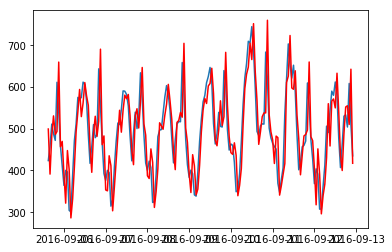

In [4]:
from datetime import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima_model import ARIMA
from pandas.plotting import autocorrelation_plot
from pandas import DataFrame

conso = pd.read_csv('./Data/conso_train.csv', sep=';')
conso.date = pd.to_datetime(conso.date)
conso.index = conso.date

X = conso.puissance
size = int(len(X) * 0.98)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
	model = ARIMA(history, order=(5,1,0))
	model_fit = model.fit(disp=0)
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# conversion de la liste predictions en DataFrame et ajout du même index que Test pour pouvoir les plot sur le même graphe
predictions = pd.DataFrame.from_records(predictions)
predictions.index = test.index
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

In [17]:
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima_model import ARIMAResults
 
# monkey patch around bug in ARIMA class
def __getnewargs__(self):
	return ((self.endog),(self.k_lags, self.k_diff, self.k_ma))
ARIMA.__getnewargs__ = __getnewargs__
 
# load data
conso = pd.read_csv('./Data/conso_train.csv', sep=';')
conso.date = pd.to_datetime(conso.date)
conso.index = conso.date
X = difference(conso.puissance.values)
X = X.astype('float32')
# fit model
model = ARIMA(X, order=(1,1,1))
model_fit = model.fit()
# save model
model_fit.save('./ARIMA/arima_model.pkl')
# load model
loaded = ARIMAResults.load('./ARIMA/arima_model.pkl')
# save the differenced dataset
numpy.save('./ARIMA/arima_data.npy', X)
# save the last ob
numpy.save('./ARIMA/arima_obs.npy', [conso.puissance.values[-1]])

"\nfrom pandas import Series\nfrom statsmodels.tsa.arima_model import ARIMA\nfrom statsmodels.tsa.arima_model import ARIMAResults\nimport numpy\n \n# create a difference transform of the dataset\ndef difference(dataset):\n\tdiff = list()\n\tfor i in range(1, len(dataset)):\n\t\tvalue = dataset[i] - dataset[i - 1]\n\t\tdiff.append(value)\n\treturn numpy.array(diff)\n\n\n\n# load dataset\nconso = pd.read_csv('./Data/conso_train.csv', sep=';')\nconso.date = pd.to_datetime(conso.date)\nconso.index = conso.date\nX = difference(conso.puissance.values)\n# fit model\nmodel = ARIMA(X, order=(1,1,1))\nmodel_fit = model.fit(maxlag=6, disp=0)\n# save model to file\nmodel_fit.save('./ARIMA/arima_model.pkl')\n# save the differenced dataset\nnumpy.save('./ARIMA/arima_data.npy', X)\n# save the last ob\nnumpy.save('./ARIMA/arima_obs.npy', [conso.puissance.values[-1]])\n"

In [19]:
from statsmodels.tsa.arima_model import ARIMAResults
import numpy
# load model
model = ARIMAResults.load('./ARIMA/arima_model.pkl')
data = numpy.load('./ARIMA/arima_data.npy')
last_ob = numpy.load('./ARIMA/arima_obs.npy')
# make prediction
predictions = model.predict(start=len(data), end=len(data)+168) # une valeur par heure pendant une semaine = 168

predictions = predictions + last_ob
display(predictions)

array([ 482.94693006,  452.14038411,  441.12743872,  437.19045186,
        435.78302952,  435.27989406,  435.10002959,  435.03573034,
        435.01274418,  435.00452693,  435.00158936,  435.00053922,
        435.00016381,  435.00002961,  434.99998163,  434.99996448,
        434.99995835,  434.99995615,  434.99995537,  434.99995509,
        434.99995499,  434.99995496,  434.99995494,  434.99995494,
        434.99995494,  434.99995494,  434.99995494,  434.99995494,
        434.99995494,  434.99995494,  434.99995494,  434.99995494,
        434.99995494,  434.99995494,  434.99995494,  434.99995494,
        434.99995494,  434.99995494,  434.99995494,  434.99995494,
        434.99995494,  434.99995494,  434.99995494,  434.99995494,
        434.99995494,  434.99995494,  434.99995494,  434.99995494,
        434.99995494,  434.99995494,  434.99995494,  434.99995494,
        434.99995494,  434.99995494,  434.99995494,  434.99995494,
        434.99995494,  434.99995494,  434.99995494,  434.99995

In [20]:
import datetime

predictions = pd.DataFrame(predictions)
date = pd.to_datetime('2016-09-13T00:00:00+02:00') #date de fin des données et de début de la prédiction
preddate = []
for i in range(169):
    date = date + datetime.timedelta(0,3600); # On fait une prédiction toutes les 3600 secondes soit toutes les heures
    preddate.append(date)
predictions['date'] = preddate
predictions.columns = ['puissance', 'date']
predictions.date = pd.to_datetime(predictions.date)
predictions.index = predictions.date
predictions = predictions.drop('date', axis=1)
display(predictions.head())

,puissance
date,
2016-09-12 23:00:00,482.946930
2016-09-13 00:00:00,452.140384
2016-09-13 01:00:00,441.127439
2016-09-13 02:00:00,437.190452
2016-09-13 03:00:00,435.783030


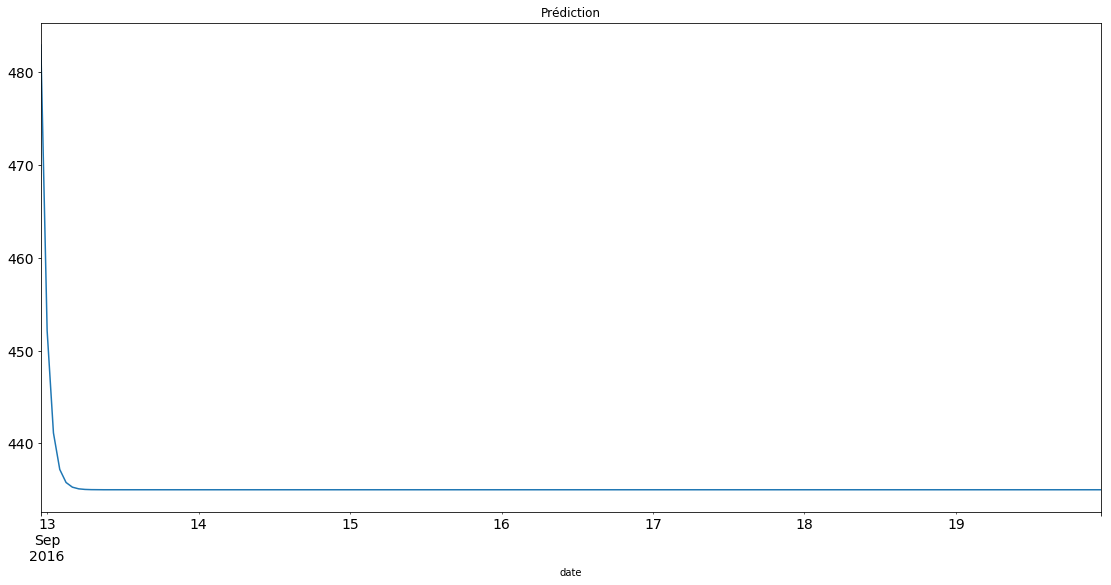

In [21]:
predictions.puissance.plot(figsize=(19,9), title='Prédiction', fontsize=14)
plt.show()

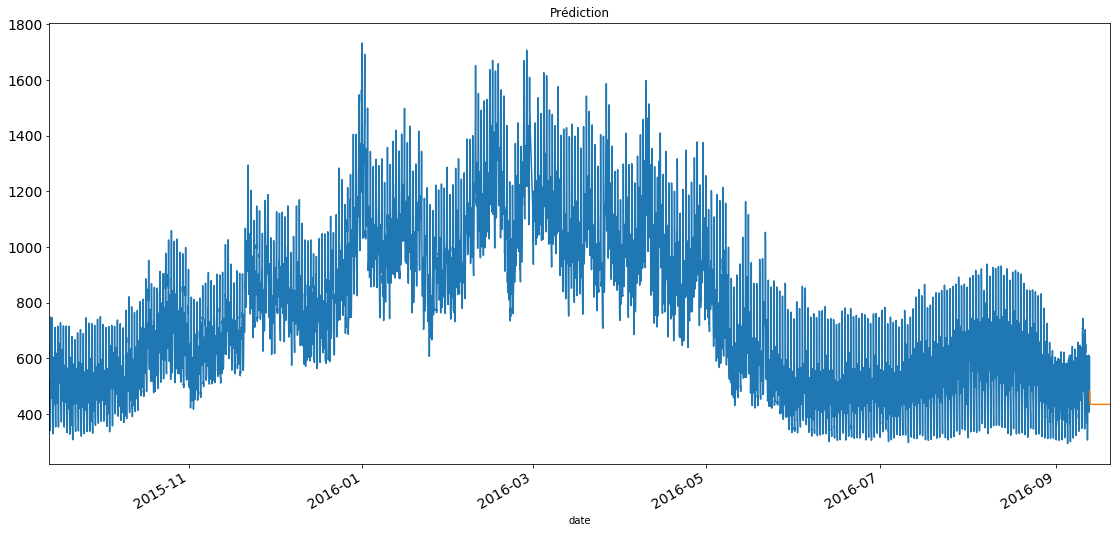

In [22]:
conso.puissance.plot(figsize=(19,9), title='Consommation', fontsize=14)
predictions.puissance.plot(figsize=(19,9), title='Prédiction', fontsize=14)
plt.show()